## The draining cup problem

In this notebook we will be modelling a draining cup. We assume the cup is shaped like a [conical frustrum](http://mathworld.wolfram.com/ConicalFrustum.html) or truncated cone:

![](cup.png)

$D$ and $d$ are the top and bottom diameters of the cup, $H$ is the side length between the diameters, $d_h$ is the hole diameter. We also define $H'$ as the vertical height of the cup and $h$ as the vertical height (or level) of the liquid in the cup

### Volume-height relationship

Let's work out the relationship between the volume of water and the level in the cup by integrating the area:

$$V = \int_0^h A(h) dh$$

In [1]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate
sympy.init_printing()

In [2]:
D, d, H, h = sympy.symbols('D, d, H, h', real=True)

In [3]:
R = D/2
r = d/2
Hprime = sympy.sqrt(H**2 - (R - r)**2)  # Pythagoras

The radius changes linearly from the small one to the large one:

In [4]:
radius = r + h/Hprime*(R - r)

Now it is easy to calculate the area:

In [5]:
A = sympy.pi*radius**2

And from there, the volume:

In [6]:
V = sympy.integrate(A, (h, 0, h))

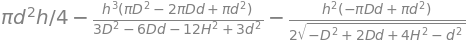

In [14]:
V

### Dynamic model

The basic model of the cup we will be working with looks something like this:

\begin{align}
\frac{dV}{dt} &= -F_{\text{out}} & \text{Mass Balance simplified to volume balance} \\
F_{\text{out}} &= f(h) & \text{Hydraulics} \\
h &= f(V) & \text{Geometry} \\
\end{align}

The above geometric description allows us to find the $V(h)$, but we actually want $h(V)$.

In [9]:
Vsymb = sympy.symbols('V', real=True)

In [12]:
hV = sympy.solve(Vsymb - V, h)[0]

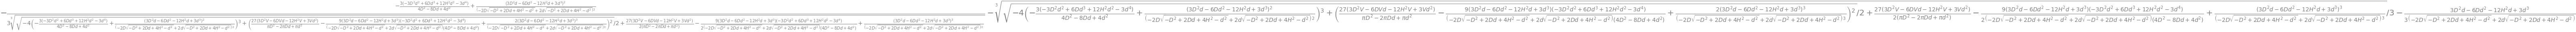

In [13]:
sympy.radsimp(hV{})
hV

Now that is not a very nice equation, especially since there are multiple roots. Surely there is a better way to relate the volume of the cup to the height. Lets start by turning the volume equation into a function:

In [16]:
Vfunc = sympy.lambdify([h,D,H,d],V)

This allows us to evaluate the integral for various heights and determine the volume of the cup for that height. Now to find that relationship:

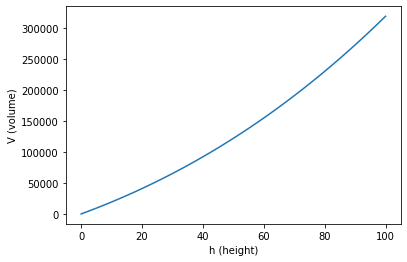

In [44]:
Dval = 80
dval = 48
Hval = 107

hlist = np.linspace(0,100,101)
Vlist = np.zeros_like(hlist)

for i,hval in enumerate(hlist):
    Vlist[i] = Vfunc(hval,Dval,Hval,dval) 
    
plt.plot(hlist,Vlist)
plt.xlabel('h (height)')
plt.ylabel('V (volume)')
plt.show()

This gives us a expected relationship between the height and volume, now to relate the volume to the height. One can fit polynomial to the data but a simple interpolation function will also work:

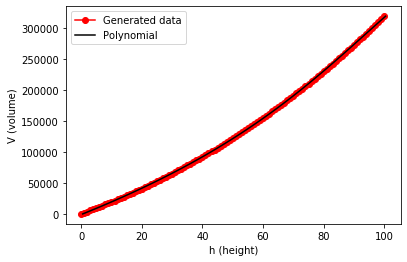

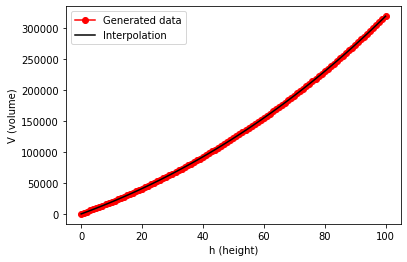

In [53]:
hpoly = np.polyfit(Vlist,hlist,3)
hvals = np.polyval(hpoly,Vlist)

plt.plot(hlist,Vlist,'ro-',label = 'Generated data')
plt.plot(hvals,Vlist,'k',label = 'Polynomial')
plt.xlabel('h (height)')
plt.ylabel('V (volume)')
plt.legend(loc = 'best')
plt.show()

# or

hf = lambda V: np.interp(V,Vlist,hlist)

hvals2 = [hf(vi) for vi in Vlist]
plt.plot(hlist,Vlist,'ro-',label = 'Generated data')
plt.plot(hvals2,Vlist,'k',label = 'Interpolation')
plt.xlabel('h (height)')
plt.ylabel('V (volume)')
plt.legend(loc = 'best')
plt.show()

These are equivalent.

Now onto the simulation, we are able to relate the volume, $V$ to a specific height, $h$ and then calculate the $F_{out}$ which then gives us $\frac{dV}{dt}$. The resulting function is:

In [ ]:
def func(t,V):
    h = hf(V)
    Fout = h*k
    dVdt = -Fout
    return dVdt

In [69]:
# parameters
D = 80
d = 48
H = 107

# emperical constant
k = 42

# initial condition
Vo = Vlist[-1]

sol = scipy.integrate.solve_ivp(func,(0,250),[Vo]) # Note solve_ivp wants your initial condition as a list []
    
sol    

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.37733411e-01, 2.61506752e+00, 2.62531127e+01,
       8.63391575e+01, 1.46425202e+02, 1.99787332e+02, 2.50000000e+02])
 t_events: None
        y: array([[318933.68873946, 317936.24834902, 308075.68574306,
        221059.23219936,  80811.58943364,  23338.67654126,
          7224.59133982,   2334.27514473]])
 y_events: None

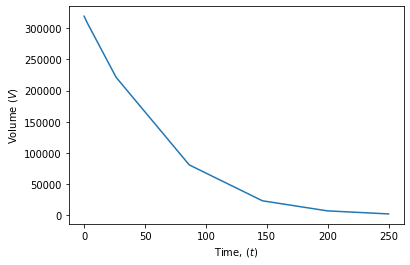

In [70]:
plt.plot(sol.t,sol.y.T)
plt.ylabel('Volume ($V$)')
plt.xlabel('Time, ($t$)')
plt.show()

To get the curve smooth we can limit the step size:

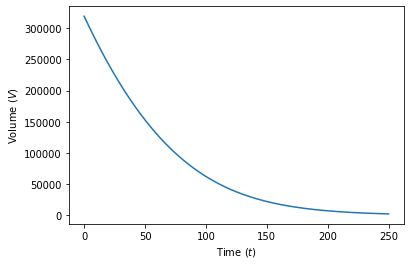

In [67]:
sol = scipy.integrate.solve_ivp(func,(0,250),[Vo], max_step = 1)
plt.plot(sol.t,sol.y.T)
plt.ylabel('Volume ($V$)')
plt.xlabel('Time ($t$)')
plt.show()